# Bharat Intern Internship

# Task 2 : Titanic Classification
BY GANESH KARIBANDI

# Introduction
->Understand the Dataset & cleanup .
  
     - The dataset contains information about the passengers and crew of the Titanic, such as their name, sex, age, ticket class, fare, cabin, embarked port, and whether they survived or not. You can download the dataset from  https://www.kaggle.com/c/titanic/data.
     - The dataset has 891 rows and 12 columns. You can use a tool like Excel or Google Sheets to view and analyze the data. You can also use a programming language like Python or R to load and manipulate the data.
     - The dataset may contain some missing or incorrect values, such as NaN, empty strings, or outliers. You can use various methods to handle these values, such as deleting, replacing, or imputing them. You can also check for any duplicates or inconsistencies in the data and remove or correct them.
     - You can also perform some exploratory data analysis (EDA) to understand the distribution, correlation, and relationship of the variables. You can use tools like charts, graphs, tables, or statistics to visualize and summarize the data. 
     
-> Build a strong classification model to predict whether the passenger survives or not.

    - The goal of this challenge is to build a classification model that can predict the survival outcome of a passenger based on their features. You can use various algorithms and techniques to build and train your model, such as logistic regression, decision tree, random forest, support vector machine, neural network, etc.
    - You can use a tool like [scikit-learn] or [TensorFlow] to implement your model in Python, or [caret] or [keras] to implement your model in R. You can also use a tool like [Google Colab] or [Kaggle] to run your code online and access various libraries and resources.
    - You can use a tool like [train_test_split] or [cross_val_score] to split your data into training and testing sets, and evaluate your model's performance on the unseen data. You can use various metrics and methods to measure your model's accuracy, precision, recall, f1-score, roc curve, confusion matrix, etc.
    
-> Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.
  
    - Hyperparameters are the parameters that control the behavior and performance of your model, such as the learning rate, the number of trees, the kernel type, the activation function, etc. You can use various methods to fine-tune your hyperparameters, such as grid search, random search, bayesian optimization, etc.
    - You can use a tool like [GridSearchCV] or [RandomizedSearchCV] to perform hyperparameter tuning in Python, or [tune] or [tuneRanger] to perform hyperparameter tuning in R. You can also use a tool like [Optuna] or [Hyperopt] to perform bayesian optimization in Python, or [mlr3tuning] or [rBayesianOptimization] to perform bayesian optimization in R.
    - You can compare the evaluation metrics of various classification algorithms to find the best model for your problem. You can use tools like [classification_report] or [roc_auc_score] to compare the metrics in Python, or [confusionMatrix] or [roc] to compare the metrics in R. You can also use tools like [matplotlib] or [seaborn] to plot the metrics in Python, or [ggplot2] or [plotly] to plot the metrics in R.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic_data =pd.read_csv("train.csv")
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\ganes\AppData\Local\Temp\ipykernel_18412\2812193876.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(),cmap='YlGnBu')


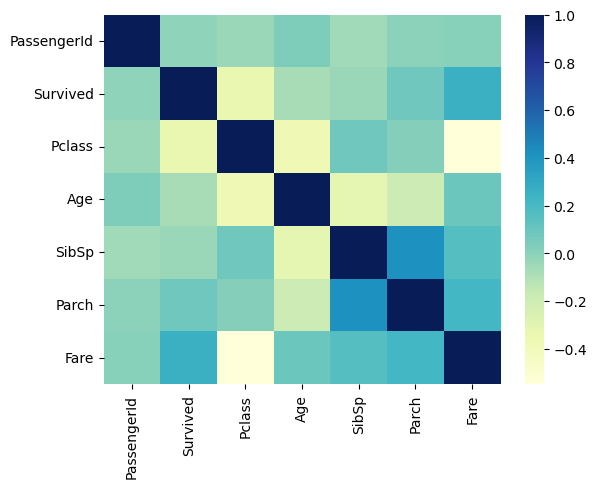

In [5]:
sns.heatmap(titanic_data.corr(),cmap='YlGnBu')
plt.show()

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_indices,test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass","Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]
    

In [7]:
strat_train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S
761,762,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S
768,769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,363294,8.0500,NaN,S
397,398,0,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0000,NaN,S


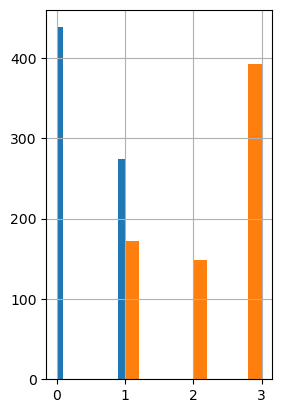

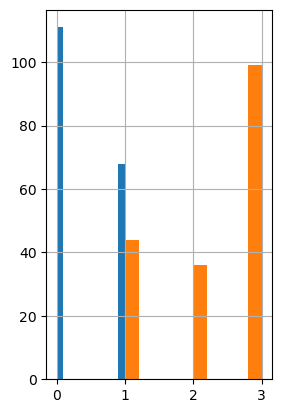

In [8]:
plt.subplot(1,2,2)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()
plt.show()

plt.subplot(1,2,2)
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()
plt.show()

In [9]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 857 to 863
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          565 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        165 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [10]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        imputer =SimpleImputer(strategy="mean")
        X["Age"] =imputer.fit_transform(X[["Age"]])
        return X

In [11]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        return self

    def transform(Self,X):
        encoder =OneHotEncoder()
        matrix = encoder.fit_transform(X[["Embarked"]]).toarray()
        
        column_names=["C","S","Q","N"]    
    
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        matrix = encoder.fit_transform(X[["Sex"]]).toarray()
    
        column_names =["Female","Male"]
    
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        return X    

In [12]:
class FeatureDropper(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"],axis=1,errors="ignore")

In [13]:
from sklearn.pipeline import Pipeline

pipeline =Pipeline([("ageimputer",AgeImputer()),
                    ("featureenconder",FeatureEncoder()),
                    ("featuredropper",FeatureDropper())])

In [14]:
strat_train_set =pipeline.fit_transform(strat_train_set)

In [15]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 857 to 863
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [17]:
from sklearn.preprocessing import StandardScaler

X= strat_train_set.drop(['Survived'],axis=1)
Y=strat_train_set['Survived']

scaler = StandardScaler()
X_data =scaler.fit_transform(X)
Y_data = Y.to_numpy()

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid =[{"n_estimators":[10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}]

grid_search =GridSearchCV(clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_data,Y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [23]:
final_clf =grid_search.best_estimator_

In [24]:
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=4)

In [27]:
strat_test_set =pipeline.fit_transform(strat_test_set)

In [28]:
strat_test_set.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
889,890,1,1,26.000000,0,0,30.000,1.0,0.0,0.0,0.0,1.0
610,611,0,3,39.000000,1,5,31.275,0.0,0.0,1.0,1.0,0.0
442,443,0,3,25.000000,1,0,7.775,0.0,0.0,1.0,0.0,1.0
466,467,0,2,28.980204,0,0,0.000,0.0,0.0,1.0,0.0,1.0
161,162,1,2,40.000000,0,0,15.750,0.0,0.0,1.0,1.0,0.0


In [29]:
X_test =strat_test_set.drop(['Survived'],axis=1)
Y_test =strat_test_set['Survived']

scaler =StandardScaler()
x_data_test =scaler.fit_transform(X_test)
y_data_test = Y_test.to_numpy()


In [30]:
final_clf.score(x_data_test,y_data_test)

0.9050279329608939

In [31]:
final_data=pipeline.fit_transform(titanic_data)

In [32]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [33]:
X_final =final_data.drop(['Survived'],axis=1)
Y_final =final_data['Survived']

sacaler =StandardScaler()
x_data_final=scaler.fit_transform(X_final)
y_data_final= Y_final.to_numpy()

In [34]:
prod_clf = RandomForestClassifier()

param_grid =[{"n_estimators":[10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}]

grid_search =GridSearchCV(prod_clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_data,Y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [35]:
prod_final_clf =grid_search.best_estimator_
prod_final_clf

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=500)

In [36]:
titanic_test_data =pd.read_csv('test.csv')

In [37]:
titanic_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
final_test_data =pipeline.fit_transform(titanic_test_data)

In [39]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [40]:
X_final_test =final_test_data
X_final_test =X_final_test.fillna(method='ffill')

scaler =StandardScaler()
X_data_final_test=scaler.fit_transform(X_final_test)

In [41]:
predictions =prod_final_clf.predict(X_data_final_test)

In [42]:
final_df =pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived']=predictions
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [43]:
final_df.to_csv('solution.csv',index=False)